# Semianr 4 - Applied Quantitative Logistics

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

## Binary Knapsak Problem

The Knapsack problem can be formulated as follows:

Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is maximized.

Let:
- `n` be the number of items
- `weight[i]` be the weight of item `i`
- `value[i]` be the value of item `i`
- `W` be the maximum weight capacity of the knapsack

The goal is to maximize the sum of the values of the items in the knapsack, subject to the constraint that the sum of the weights of the items cannot exceed `W`.



**Maximize:**

$$
z = \sum_{i=1}^{n} \text{value}[i] \times x[i]
$$

Subject to the constraint:

$$ 
\sum_{i=1}^{n} \text{weight}[i] \times x[i] \leq W 
$$

and

$$
x_i \in \{0, 1\}
$$

In [2]:
# Let's consider 50 objects

# Values
np.random.seed(10)
v = list(np.random.randint(10, 90, size=50))

# Weights
np.random.seed(12)
w = list(np.random.randint(100, 900, size=50))

n = len(v)    # Number of Objects
W = 10000     # Maximum Weights

### Creating Random Solution

In [3]:
def GeneateSolution(n):
    x = list(np.random.randint(0, 2, size=n))
    return x

### Cost Function

In [4]:
def KnapsakCost(x, v, w, W):
    
    global NFE
    if NFE == None:
        NFE=0
    
    NFE += 1
    
    # Store some information
    GanedValue = np.dot(v, x)
    LostValue = np.dot(v, (1-np.array(x)))
    GanedWeight = np.dot(w, x)
    LostWeight = np.dot(w, (1-np.array(x)))
    
    violation = max(GanedWeight/W-1, 0)
    
    alpha = 10000
    
    z = LostValue + alpha*violation
    
    isFeasible = violation == 0
    
    sol = {"GanedValue": GanedValue,
           "LostValue": LostValue,
           "GanedWeight": GanedWeight,
           "LostWeight": LostWeight,
           "isFeasible": isFeasible
    }
    
    return z, sol

### Now We Use All Functions From GA Binary

### Mutation

In [5]:
def Mutation(x):
    index = int(np.random.randint(0, len(x), size=1))
    
    y = x.copy()
    
    y[index] = 1-x[index]
    
    return y

## Simmulated Annealing (SA)

In [6]:
### Problem Parameters Definition ###
nVar = len(v)       # Number of decision variables

### SA Parameters --------------------------
global NFE
NFE = 0

maxIt = 1000    # maximum number of iteration

T0 = 100        # initial temprature
alpha = 0.99    # temprature reduction rate

sol_dict = []

sol = GeneateSolution(nVar)  # Generate a random solution
cost, s = KnapsakCost(sol, v, w, W)      # Evaluating the tour

sol_dict.append(s)

BestSol = sol
BestCost = cost

BestCost_list= np.zeros(maxIt-1)     # Array to Hold Best Values

T = T0   # Initialize Temp.

### SA Main Loop --------------------------
for it in range(1, maxIt):
    newsol = Mutation(sol)
    newcost, s = KnapsakCost(newsol, v, w, W)
    
    if newcost <= cost:      # If new NEWSOL is better than SOL
        sol = newsol
        cost = newcost
    else:                    # If NEWSOL is NOT better than SOL
        DELTA = newcost - cost
        P = math.exp(-DELTA/T)
        r = np.random.random()
        if P>=r:
            sol = newsol
            cost = newcost
            sol_dict.append(s)
            
    if cost <= BestCost:
        BestSol = sol
        BetCost = cost
        
    BestCost_list[it-1], s  = KnapsakCost(BestSol, v, w, W)
            
    # Display Iteration Information
    print(f'Iteration: {it}, Best Cost = {BestCost_list[it-1]}')
    
    # Update Temp.
    T = alpha*T

Iteration: 1, Best Cost = 5165.0
Iteration: 2, Best Cost = 5165.0
Iteration: 3, Best Cost = 4689.0
Iteration: 4, Best Cost = 4689.0
Iteration: 5, Best Cost = 4689.0
Iteration: 6, Best Cost = 4594.0
Iteration: 7, Best Cost = 4594.0
Iteration: 8, Best Cost = 4594.0
Iteration: 9, Best Cost = 4594.0
Iteration: 10, Best Cost = 4594.0
Iteration: 11, Best Cost = 4594.0
Iteration: 12, Best Cost = 4594.0
Iteration: 13, Best Cost = 4122.0
Iteration: 14, Best Cost = 3843.000000000001
Iteration: 15, Best Cost = 3843.000000000001
Iteration: 16, Best Cost = 3065.0
Iteration: 17, Best Cost = 3065.0
Iteration: 18, Best Cost = 3065.0
Iteration: 19, Best Cost = 2996.0000000000005
Iteration: 20, Best Cost = 2448.999999999999
Iteration: 21, Best Cost = 1954.000000000001
Iteration: 22, Best Cost = 1954.000000000001
Iteration: 23, Best Cost = 1854.9999999999995
Iteration: 24, Best Cost = 1854.9999999999995
Iteration: 25, Best Cost = 1724.000000000001
Iteration: 26, Best Cost = 1724.000000000001
Iteration: 2

### Plot the Result

In [10]:
print(BestSol)

[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0]


In [11]:
BestCost

5614.0

In [12]:
s

{'GanedValue': 1252,
 'LostValue': 1065,
 'GanedWeight': 9995,
 'LostWeight': 14727,
 'isFeasible': True}

Text(0, 0.5, 'Costs')

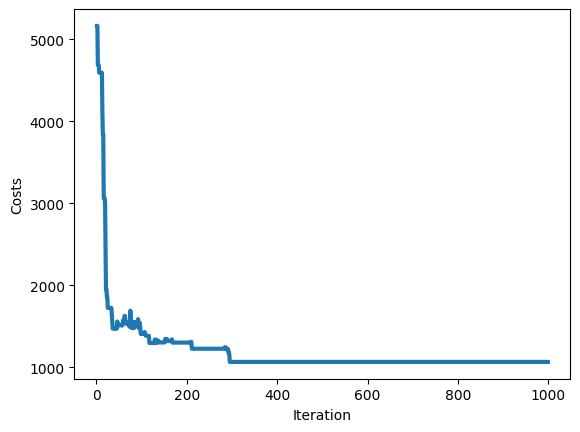

In [7]:
# Plot the result
plt.plot(range(1, maxIt), BestCost_list, linewidth = 3)
plt.xlabel('Iteration')
plt.ylabel('Costs')

Text(0, 0.5, 'Costs')

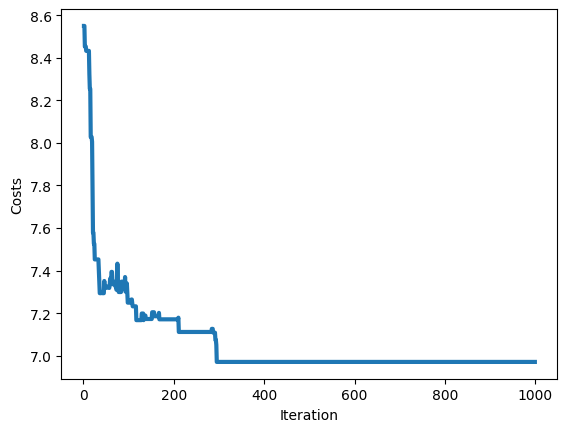

In [8]:
# Plot the result in logarithm format
plt.plot(range(1, maxIt), np.log(BestCost_list), linewidth = 3)
plt.xlabel('Iteration')
plt.ylabel('Costs')